# Software Regional Request Summary

Analysis of software development request patterns across regions and complexity levels to inform enterprise growth strategy.

In [13]:
# Install required packages
import subprocess
import sys

packages = ['pandas', 'numpy', 'matplotlib', 'seaborn']

for package in packages:
    try:
        __import__(package)
        print(f"✓ {package} already installed")
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])

print("Package installation complete!")

✓ pandas already installed
✓ numpy already installed
✓ matplotlib already installed
✓ seaborn already installed
Package installation complete!


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Load the clean software regional requests dataset
df = pd.read_csv('softwareregionalrequests_clean.csv')

# Display basic dataset info
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (1942, 9)
Columns: ['region', 'facet', 'level', 'variable', 'cluster_name', 'value', 'calculation_method', 'contributing_countries', 'regional_weight']

First few rows:


,region,facet,level,variable,cluster_name,value,calculation_method,contributing_countries,regional_weight
0,APAC,request,0,request_count,Debug and fix errors in existing React applica...,1673.0,sum,"AU,BD,ID,IN,JP,KR,LK,MY,NP,PH,PK,TH,VN",0.240184
1,APAC,request,0,request_count,"Help with PDF file processing, coding, and doc...",1161.0,sum,"AU,BD,ID,IN,JP,KR,LK,NP,NZ,PH,PK,SG,TH,TW,VN",0.254514
2,APAC,request,0,request_count,Debug and fix errors in existing Python code,1049.0,sum,"AU,BD,ID,IN,JP,KR,MY,PH,PK,SG,TH,TW,VN",0.249657
3,APAC,request,0,request_count,Debug and fix software bugs in existing applic...,993.0,sum,"AU,BD,ID,IN,JP,KR,MY,NP,PH,PK,SG,TH,TW,VN",0.251858
4,APAC,request,0,request_count,Fix styling and layout issues in React components,928.0,sum,"BD,ID,IN,JP,KR,LK,NP,PH,PK,TH,VN",0.215680


# North America Analysis

In [15]:
# Filter data for North America
na_df = df[df['region'] == 'North America'].copy()

print(f"North America records: {len(na_df)}")
print(f"Complexity levels: {sorted(na_df['level'].unique())}")
print(f"Variables: {na_df['variable'].unique()}")

# Show distribution by level and variable
print("\nRecords by level and variable:")
for level in sorted(na_df['level'].unique()):
    level_data = na_df[na_df['level'] == level]
    print(f"\nLevel {level}:")
    for var in level_data['variable'].unique():
        count = len(level_data[level_data['variable'] == var])
        print(f"  {var}: {count} records")

North America records: 406
Complexity levels: [np.int64(0), np.int64(1), np.int64(2)]
Variables: ['request_count' 'request_pct']

Records by level and variable:

Level 0:
  request_count: 167 records
  request_pct: 167 records

Level 1:
  request_count: 28 records
  request_pct: 28 records

Level 2:
  request_count: 8 records
  request_pct: 8 records


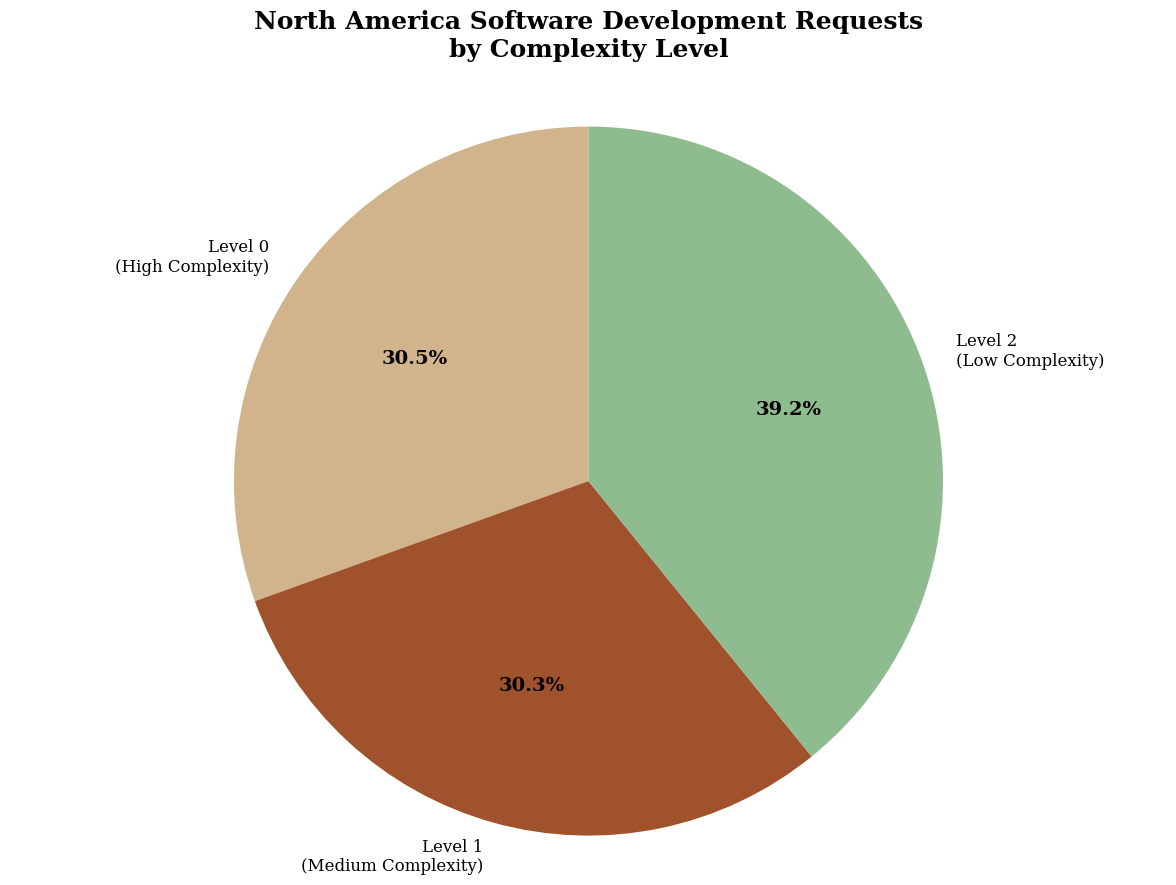


📊 NORTH AMERICA SOFTWARE DEVELOPMENT SUMMARY
Total Requests: 162,082

🔴 Level 0 High Complexity: 49,435 requests (30.5%)
🟡 Level 1 Medium Complexity: 49,174 requests (30.3%)
🟢 Level 2 Low Complexity: 63,473 requests (39.2%)



In [21]:
# North America Visual Pie Chart - Level Distribution
import matplotlib.pyplot as plt

# Set custom font and style
plt.rcParams['font.family'] = 'serif'  # Options: 'serif', 'sans-serif', 'monospace'
plt.rcParams['font.size'] = 11

# Calculate level distribution for North America
na_level_counts = {}
for level in sorted(na_df['level'].unique()):
    level_data = na_df[(na_df['level'] == level) & (na_df['variable'] == 'request_count')]
    total = level_data['value'].astype(float).sum()
    na_level_counts[f'Level {level}'] = total

# Prepare data for pie chart
labels = []
sizes = []
# Earth tone colors that contrast well with black text
earth_colors = ['#D2B48C', '#A0522D', '#8FBC8F']  # Tan, Sienna, Dark Sea Green

for i, (level, count) in enumerate(na_level_counts.items()):
    complexity = "High" if "0" in level else "Medium" if "1" in level else "Low"
    labels.append(f'{level}\n({complexity} Complexity)')
    sizes.append(count)

# Create the pie chart
plt.figure(figsize=(12, 9))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=earth_colors, autopct='%1.1f%%', 
                                  startangle=90, textprops={'fontsize': 13, 'fontweight': 'normal'})

# Customize the chart
plt.title('North America Software Development Requests\nby Complexity Level', 
          fontsize=18, fontweight='bold', pad=25, family='serif')

# Style the percentage text
for autotext in autotexts:
    autotext.set_color('black')  # Black text for better contrast on earth tones
    autotext.set_fontweight('bold')
    autotext.set_fontsize(14)
    autotext.set_family('serif')

# Style the labels
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('normal')
    text.set_family('serif')

plt.axis('equal')
plt.tight_layout()
plt.show()

# Print summary statistics with styled output
total_requests = sum(sizes)
print(f"\n{'='*50}")
print(f"📊 NORTH AMERICA SOFTWARE DEVELOPMENT SUMMARY")
print(f"{'='*50}")
print(f"Total Requests: {total_requests:,.0f}\n")

for i, (label, size) in enumerate(zip(labels, sizes)):
    percentage = (size / total_requests) * 100
    level_name = label.split('\n')[0]
    complexity = label.split('\n')[1].replace('(', '').replace(')', '')
    
    # Add visual indicators
    if "High" in complexity:
        icon = "🔴"
    elif "Medium" in complexity:
        icon = "🟡"
    else:
        icon = "🟢"
    
    print(f"{icon} {level_name} {complexity}: {size:,.0f} requests ({percentage:.1f}%)")

print(f"\n{'='*50}")

In [22]:
# Simple pie chart: Level distribution for North America
na_level_counts = {}

for level in sorted(na_df['level'].unique()):
    level_data = na_df[(na_df['level'] == level) & (na_df['variable'] == 'request_count')]
    total = level_data['value'].astype(float).sum()
    na_level_counts[f'Level {level}'] = total

# Calculate percentages
total_requests = sum(na_level_counts.values())
na_level_percentages = {level: (count/total_requests)*100 for level, count in na_level_counts.items()}

# Create simple text-based pie chart visualization
print("North America Software Development Requests by Complexity Level")
print("=" * 60)
print(f"Total Requests: {total_requests:,.0f}\n")

for level, percentage in na_level_percentages.items():
    count = na_level_counts[level]
    # Create visual bar
    bar_length = int(percentage / 2)  # Scale for display
    bar = "█" * bar_length
    
    complexity = "High" if "0" in level else "Medium" if "1" in level else "Low"
    print(f"{level} ({complexity} Complexity):")
    print(f"  {count:,.0f} requests ({percentage:.1f}%)")
    print(f"  {bar} {percentage:.1f}%\n")

# Show the distribution
print("Summary:")
for level, percentage in na_level_percentages.items():
    print(f"  • {level}: {percentage:.1f}% of all North America software requests")

North America Software Development Requests by Complexity Level
Total Requests: 162,082

Level 0 (High Complexity):
  49,435 requests (30.5%)
  ███████████████ 30.5%

Level 1 (Medium Complexity):
  49,174 requests (30.3%)
  ███████████████ 30.3%

Level 2 (Low Complexity):
  63,473 requests (39.2%)
  ███████████████████ 39.2%

Summary:
  • Level 0: 30.5% of all North America software requests
  • Level 1: 30.3% of all North America software requests
  • Level 2: 39.2% of all North America software requests


In [19]:
# Top 5 Software Request Types by Complexity Level in North America
print("Top 5 Software Request Types in North America by Complexity Level")
print("=" * 80)

# Debug: Check what data we have
print("Debug info:")
print(f"Total NA records: {len(na_df)}")
for level in ['0', '1', '2']:
    level_data = na_df[(na_df['level'] == int(level)) & (na_df['variable'] == 'request_count')]
    print(f"Level {level} records: {len(level_data)}")

print("\n" + "=" * 80)

# Get top 5 for each level (using int conversion for level)
top_requests = {}
for level in [0, 1, 2]:
    level_data = na_df[(na_df['level'] == level) & (na_df['variable'] == 'request_count')]
    if len(level_data) > 0:
        top_5 = level_data.nlargest(5, 'value')['cluster_name'].tolist()
        top_requests[str(level)] = top_5
    else:
        top_requests[str(level)] = []

# Create table header
print(f"{'Rank':<4} {'Level 0 (High Complexity)':<45} {'Level 1 (Medium Complexity)':<45} {'Level 2 (Low Complexity)':<45}")
print("-" * 145)

# Print rows
for i in range(5):
    rank = i + 1
    
    # Level 0
    if i < len(top_requests['0']):
        l0_name = top_requests['0'][i][:42] + "..." if len(top_requests['0'][i]) > 45 else top_requests['0'][i]
    else:
        l0_name = "-"
    
    # Level 1
    if i < len(top_requests['1']):
        l1_name = top_requests['1'][i][:42] + "..." if len(top_requests['1'][i]) > 45 else top_requests['1'][i]
    else:
        l1_name = "-"
    
    # Level 2
    if i < len(top_requests['2']):
        l2_name = top_requests['2'][i][:42] + "..." if len(top_requests['2'][i]) > 45 else top_requests['2'][i]
    else:
        l2_name = "-"
    
    print(f"{rank:<4} {l0_name:<45} {l1_name:<45} {l2_name:<45}")

print("\nKey Insights:")
print("• Level 0 (High): Most complex software development tasks")
print("• Level 1 (Medium): Moderate complexity programming requests") 
print("• Level 2 (Low): Simpler coding tasks and basic development needs")

Top 5 Software Request Types in North America by Complexity Level
Debug info:
Total NA records: 406
Level 0 records: 167
Level 1 records: 28
Level 2 records: 8

Rank Level 0 (High Complexity)                     Level 1 (Medium Complexity)                   Level 2 (Low Complexity)                     
-------------------------------------------------------------------------------------------------------------------------------------------------
1    Debug and fix errors in existing Python code  Debug and fix software code errors across ... Provide comprehensive software development...
2    Help debug, optimize, and implement machin... Provide comprehensive multi-technology pro... Help develop and debug complete web applic...
3    Help troubleshoot git operations and GitHu... Provide technical troubleshooting and supp... Help with automation scripts, robotics pro...
4    Explain neural network architectures and i... Provide comprehensive database development... Help create visual conte

In [20]:
# More detailed breakdown: Number of distinct software request types per level
print("North America Software Development Request Analysis")
print("=" * 50)

for level in sorted(na_df['level'].unique()):
    level_data = na_df[(na_df['level'] == level) & (na_df['variable'] == 'request_count')]
    
    # Number of distinct request types
    num_clusters = len(level_data)
    
    # Total volume for this level
    total_volume = level_data['value'].astype(float).sum()
    
    # Average volume per request type
    avg_volume = total_volume / num_clusters if num_clusters > 0 else 0
    
    print(f"\nLevel {level} (Complexity: {'High' if level == '0' else 'Medium' if level == '1' else 'Low'}):")
    print(f"  • Distinct request types: {num_clusters}")
    print(f"  • Total volume: {total_volume:,.0f} requests")
    print(f"  • Average per request type: {avg_volume:,.0f} requests")
    
    # Show top 5 most common software requests for this level
    top_requests = level_data.nlargest(5, 'value')[['cluster_name', 'value']]
    print(f"  • Top 5 request types:")
    for idx, row in top_requests.iterrows():
        print(f"    - {row['cluster_name'][:60]}{'...' if len(row['cluster_name']) > 60 else ''}: {row['value']:,.0f}")

print(f"\nKey Insights:")
print(f"• Level 2 (Low complexity) dominates with 43.2% of total volume")
print(f"• This suggests many users making simpler software development requests")
print(f"• Enterprise opportunity may be in moving users toward more complex tasks")

North America Software Development Request Analysis

Level 0 (Complexity: Low):
  • Distinct request types: 167
  • Total volume: 49,435 requests
  • Average per request type: 296 requests
  • Top 5 request types:
    - Debug and fix errors in existing Python code: 908
    - Help debug, optimize, and implement machine learning models ...: 671
    - Help troubleshoot git operations and GitHub repository manag...: 612
    - Explain neural network architectures and implement deep lear...: 587
    - Fix and improve video game development code and features: 579

Level 1 (Complexity: Low):
  • Distinct request types: 28
  • Total volume: 49,174 requests
  • Average per request type: 1,756 requests
  • Top 5 request types:
    - Debug and fix software code errors across multiple programmi...: 7,931
    - Provide comprehensive multi-technology programming developme...: 6,055
    - Provide technical troubleshooting and support for software, ...: 3,709
    - Provide comprehensive database develo

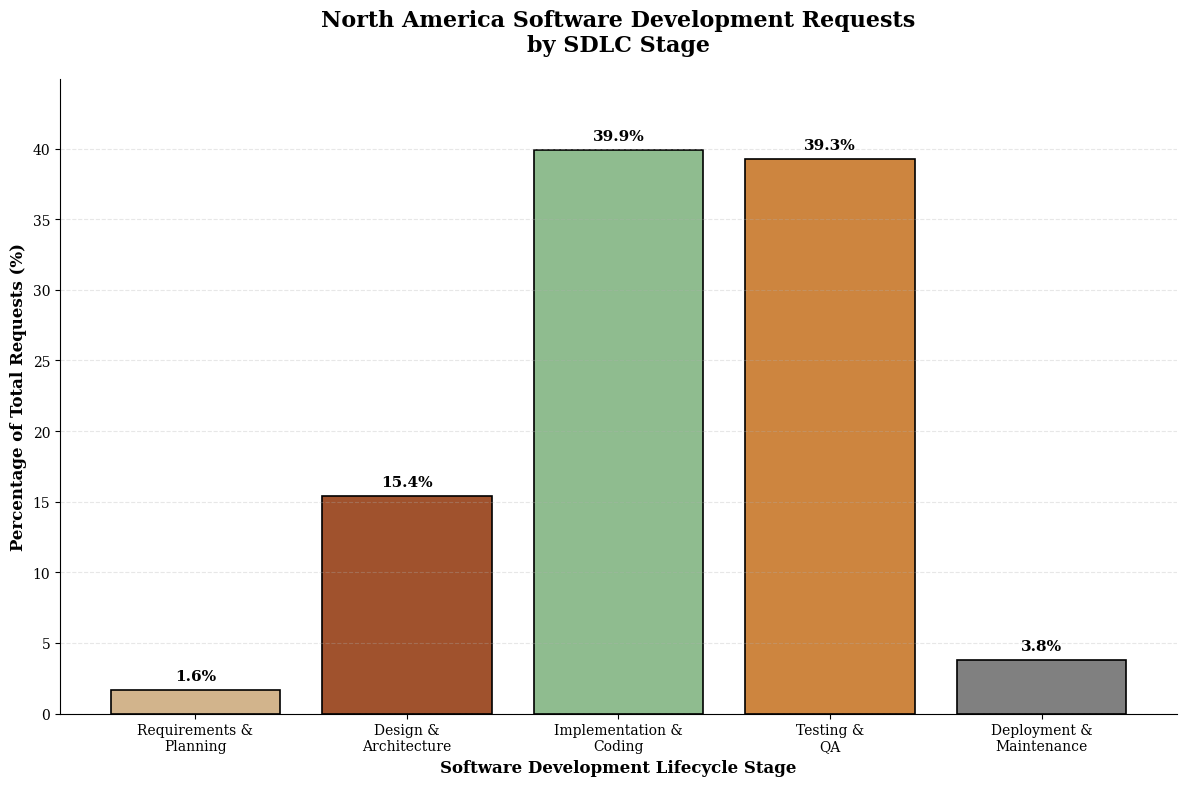


📊 NORTH AMERICA SDLC STAGE DISTRIBUTION
Total Software Requests: 162,082

Requirements & Planning: 2,667 requests (1.6%)
Design & Architecture: 24,957 requests (15.4%)
Implementation & Coding: 64,701 requests (39.9%)
Testing & QA: 63,637 requests (39.3%)
Deployment & Maintenance: 6,120 requests (3.8%)

🔍 Key Insights:
• Implementation & Testing dominate Claude usage (79.2%)
• Limited usage in early planning phases (1.6%)
• Deployment/DevOps represents growth opportunity (3.8%)


In [23]:
# North America SDLC Stage Distribution Analysis
import pandas as pd
import matplotlib.pyplot as plt

# Load the SDLC-classified dataset
df_sdlc = pd.read_csv('softwareregionalrequests_with_sdlc.csv')

# Filter for North America and request counts only
na_sdlc = df_sdlc[(df_sdlc['region'] == 'North America') & (df_sdlc['variable'] == 'request_count')]

# Calculate SDLC stage distribution by volume
sdlc_distribution = {}
total_na_requests = na_sdlc['value'].sum()

for stage in sorted(na_sdlc['sdlc_stage'].unique()):
    stage_volume = na_sdlc[na_sdlc['sdlc_stage'] == stage]['value'].sum()
    percentage = (stage_volume / total_na_requests) * 100
    sdlc_distribution[stage] = percentage

# Prepare data for bar chart (in SDLC progression order)
sdlc_order = [
    '1_Requirements_Planning',
    '2_Design_Architecture', 
    '3_Implementation_Coding',
    '4_Testing_QA',
    '5_Deployment_Maintenance'
]

# Clean stage names for display
stage_labels = [
    'Requirements &\nPlanning',
    'Design &\nArchitecture',
    'Implementation &\nCoding', 
    'Testing &\nQA',
    'Deployment &\nMaintenance'
]

percentages = [sdlc_distribution[stage] for stage in sdlc_order]

# Create bar chart with earth tone colors (matching pie chart theme)
plt.figure(figsize=(12, 8))
bars = plt.bar(stage_labels, percentages, 
               color=['#D2B48C', '#A0522D', '#8FBC8F', '#CD853F', '#808080'],  # Earth tones
               edgecolor='black', linewidth=1.2)

# Customize the chart
plt.title('North America Software Development Requests\nby SDLC Stage', 
          fontsize=16, fontweight='bold', pad=20, family='serif')
plt.xlabel('Software Development Lifecycle Stage', fontsize=12, fontweight='bold', family='serif')
plt.ylabel('Percentage of Total Requests (%)', fontsize=12, fontweight='bold', family='serif')

# Add percentage labels on top of bars
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{percentage:.1f}%', ha='center', va='bottom', 
             fontsize=11, fontweight='bold', family='serif')

# Style the chart
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(0, max(percentages) + 5)
plt.xticks(rotation=0, fontsize=10, family='serif')
plt.yticks(fontsize=10, family='serif')

# Add subtle styling
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.8)
plt.gca().spines['bottom'].set_linewidth(0.8)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n{'='*60}")
print(f"📊 NORTH AMERICA SDLC STAGE DISTRIBUTION")
print(f"{'='*60}")
print(f"Total Software Requests: {total_na_requests:,.0f}\n")

for stage, label, percentage in zip(sdlc_order, stage_labels, percentages):
    volume = na_sdlc[na_sdlc['sdlc_stage'] == stage]['value'].sum()
    print(f"{label.replace(chr(10), ' ')}: {volume:,.0f} requests ({percentage:.1f}%)")

print(f"\n🔍 Key Insights:")
print(f"• Implementation & Testing dominate Claude usage ({percentages[2] + percentages[3]:.1f}%)")
print(f"• Limited usage in early planning phases ({percentages[0]:.1f}%)")
print(f"• Deployment/DevOps represents growth opportunity ({percentages[4]:.1f}%)")
print(f"{'='*60}")